In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('../data/Spotify-2000.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.7+ KB


In [12]:
categories = {}
for genre in data['Top Genre']:
    words = genre.split(' ')
    for word in words:
        if word in categories:
            categories[word] += 1
        else:
            categories[word] = 1
{k: v for k, v in sorted(categories.items(), key=lambda item: item[1], reverse=True)}

{'acid': 1,
 'acoustic': 4,
 'adult': 123,
 'afropop': 1,
 'alaska': 1,
 'album': 413,
 'alternative': 187,
 'ambient': 1,
 'americana': 13,
 'and': 1,
 'anthem-folk': 1,
 'arkansas': 9,
 'art': 54,
 'atl': 1,
 'australian': 17,
 'austropop': 2,
 'band': 6,
 'barbadian': 3,
 'baroque': 6,
 'basshall': 1,
 'beat': 11,
 'bebop': 1,
 'belgian': 12,
 'big': 18,
 'blues': 23,
 'bow': 2,
 'boy': 6,
 'brill': 6,
 'british': 74,
 'britpop': 11,
 'bubblegum': 3,
 'building': 6,
 'cabaret': 51,
 'canadian': 14,
 'candy': 2,
 'carnaval': 10,
 'ccm': 1,
 'celtic': 13,
 'chamber': 7,
 'chanson': 9,
 'chicago': 1,
 'christelijk': 3,
 'classic': 95,
 'classical': 1,
 'coast': 6,
 'compositional': 1,
 'contemporary': 3,
 'country': 17,
 'cyberpunk': 1,
 'dance': 151,
 'danish': 3,
 'detroit': 7,
 'disco': 18,
 'diva': 1,
 'downtempo': 4,
 'dutch': 266,
 'east': 6,
 'edm': 3,
 'electro': 8,
 'electronica': 1,
 'electropop': 3,
 'eurodance': 3,
 'europop': 27,
 'finnish': 2,
 'folk': 27,
 'folk-pop': 4,

In [13]:
for i, row in data.iterrows():
    if "pop" in row['Top Genre']: 
        data.at[i,'Genre Classification'] = 2
    elif "rock" in row['Top Genre']:
        data.at[i,'Genre Classification'] = 1
    else: 
        data.at[i,'Genre Classification'] = 0

# TODO: Deal with pop rock and metal 

In [14]:
data.head(10)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Genre Classification
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,0.0
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,1.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,0.0
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,0.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,1.0
5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45,2.0
6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,2.0
7,8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69,1.0
8,9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77,1.0
9,10,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82,0.0


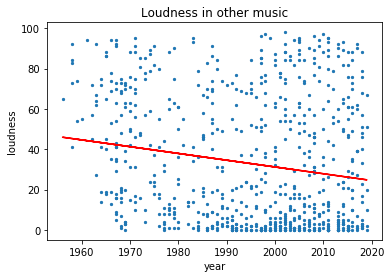

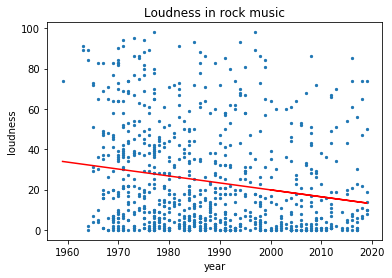

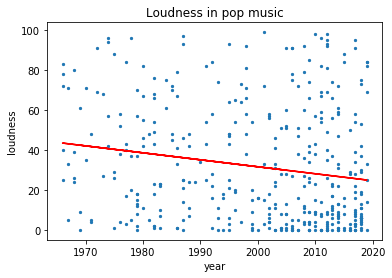

In [56]:
from sklearn import linear_model
import scipy

for genre in range(0,3):
    lm = linear_model.LinearRegression()

    frame = data[data['Genre Classification'] == genre]
    x = pd.DataFrame(frame['Year'])
    y = pd.DataFrame(frame['Acousticness'])

    lm.fit(x,y)

    fig, ax = plt.subplots()
    ax.scatter(x,y,s=5)

    genre_name =''
    if genre == 2.0:
        genre_name = "pop"
    elif genre == 1.0:
        genre_name = "rock"
    else:
        genre_name = "other"

    ax.set_xlabel("year")
    ax.set_ylabel("loudness")
    ax.set_title("Loudness " + "in " + genre_name + " music")

    ax.plot(x, lm.predict(x), color='red')

In [57]:
t1, p1 = scipy.stats.ttest_ind(data[data['Genre Classification'] == 1.0]['Danceability'], data[data['Genre Classification'] == 2.0]['Danceability'])

3.7315513663810614e-05